# Straight Line dataset

Am văzut că deși modelul cu care am lucrat în lecția precedentă avea un număr de 4 layere, mai multe hidden units în fiecare layer și am și antrenat modelul pentru mai multe epoci, calitatea modelului nu a crescut deloc. Ca sî verificăm dacă modelul acesta este unul corect, o să creem acuma un set de date liniar și o să verificăm ce performanță are acest model pe un astfel de set de date. Pentru început o să ne creem un set de date liniar asemănător cu cel pe care l-am utilizat în cadre secțiunii precedente.

In [1]:
# importing the libraries
import torch
from torch import nn

from sklearn.model_selection import train_test_split

In [7]:
# creating the dataset
start = 0
end = 1
step = 0.01

weight = 0.7
bias = 0.3

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [8]:
# split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# visualize the data
from helper_functions import plot_predictions

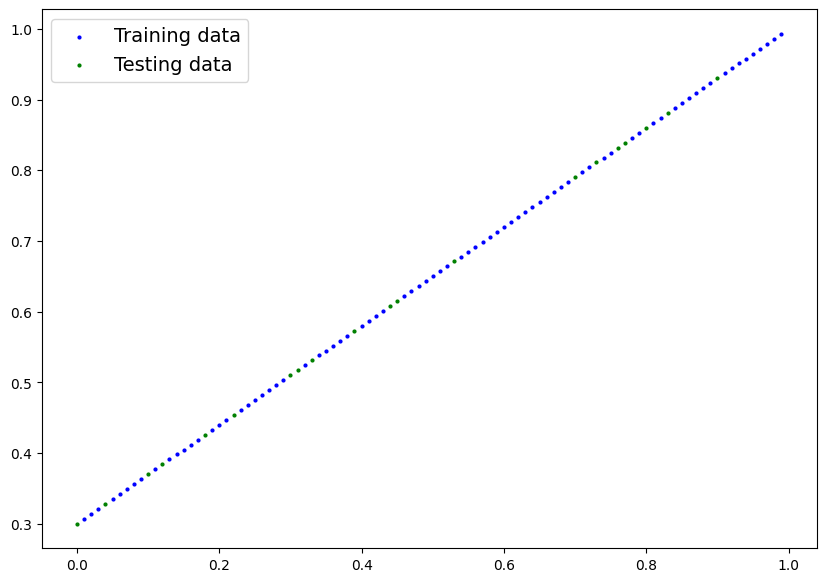

In [10]:
plot_predictions(X_train, y_train, X_test, y_test)

În continuare o să ne creem același model ca și în lecția precedentă, o singură diferență o să fie, la primul layer din cadrul acestui model o să avem doar un feature de intrare deoarece datele din X au doar un singur feature

In [11]:
# creating the model
model_0 = nn.Sequential(
    nn.Linear(in_features=1, out_features=8),
    nn.Linear(in_features=8, out_features=16),
    nn.Linear(in_features=16, out_features=8),
    nn.Linear(in_features=8, out_features=1)
)

In [12]:
model_0

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=16, bias=True)
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): Linear(in_features=8, out_features=1, bias=True)
)

Pentru început o să facem predicții cu acest model ca să vedem cum se comportă neantrenat, iar după ce îl antrenăm o să refacem predicțiile pentru a vedea ce diferență există între acestea. Prin partea asta de vizualizare putem să vedem dacă modelul respectiv învață ceva sau nu din aceste date.

In [14]:
with torch.inference_mode():
    untrained_preds = model_0(X_test)

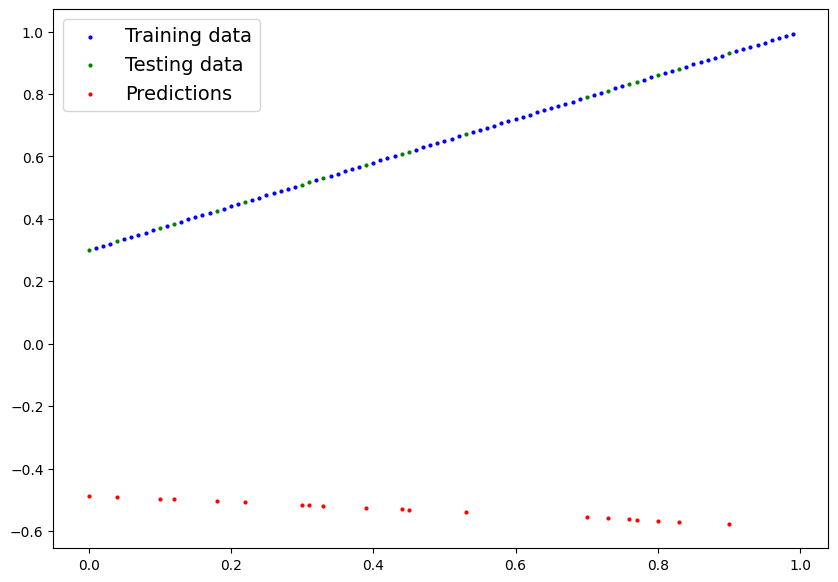

In [15]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=untrained_preds)

Rezultatul acestor valori este unul extrem de rău. O să antrenăm acuma modelul ca să vedem cum evoluează

In [16]:
# setting up a loss function and an optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.0001)

In [17]:
# train and test loop
epochs = 1000

for epoch in range(epochs):
    model_0.train()
    train_preds = model_0(X_train)
    train_loss = loss_fn(train_preds, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_preds = model_0(X_test)
        test_loss = loss_fn(test_preds, y_test)

    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {train_loss:.5f}, Test loss: {test_loss:.5f}")


Epoch: 0 | Train loss: 1.19277, Test loss: 1.14238
Epoch: 100 | Train loss: 1.15716, Test loss: 1.10698
Epoch: 200 | Train loss: 1.12204, Test loss: 1.07207
Epoch: 300 | Train loss: 1.08733, Test loss: 1.03756
Epoch: 400 | Train loss: 1.05296, Test loss: 1.00338
Epoch: 500 | Train loss: 1.01885, Test loss: 0.96946
Epoch: 600 | Train loss: 0.98493, Test loss: 0.93572
Epoch: 700 | Train loss: 0.95113, Test loss: 0.90209
Epoch: 800 | Train loss: 0.91738, Test loss: 0.86851
Epoch: 900 | Train loss: 0.88360, Test loss: 0.83491


Se pare că acest model învață din aceste date deoarece loss-ul scade atât la training data, cât și la test data. O să mai rulăm partea de training până ce ajungem la anumite valori mai bune (loss-ul să fie cât mai apropiat de 0)

In [27]:
# train and test loop
epochs = 10000

for epoch in range(epochs):
    model_0.train()
    train_preds = model_0(X_train)
    train_loss = loss_fn(train_preds, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_preds = model_0(X_test)
        test_loss = loss_fn(test_preds, y_test)

    if epoch % 1000 == 0: 
        print(f"Epoch: {epoch} | Train loss: {train_loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.00034, Test loss: 0.00040
Epoch: 1000 | Train loss: 0.00034, Test loss: 0.00039
Epoch: 2000 | Train loss: 0.00034, Test loss: 0.00040
Epoch: 3000 | Train loss: 0.00034, Test loss: 0.00040
Epoch: 4000 | Train loss: 0.00034, Test loss: 0.00040
Epoch: 5000 | Train loss: 0.00034, Test loss: 0.00040
Epoch: 6000 | Train loss: 0.00034, Test loss: 0.00040
Epoch: 7000 | Train loss: 0.00033, Test loss: 0.00040
Epoch: 8000 | Train loss: 0.00033, Test loss: 0.00041
Epoch: 9000 | Train loss: 0.00034, Test loss: 0.00039


Acum după ce am reantrean modelul și am ajuns la o valoare bună pentru loss o să refacem predicții ca să vedem cum arată acestea acuma

In [28]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

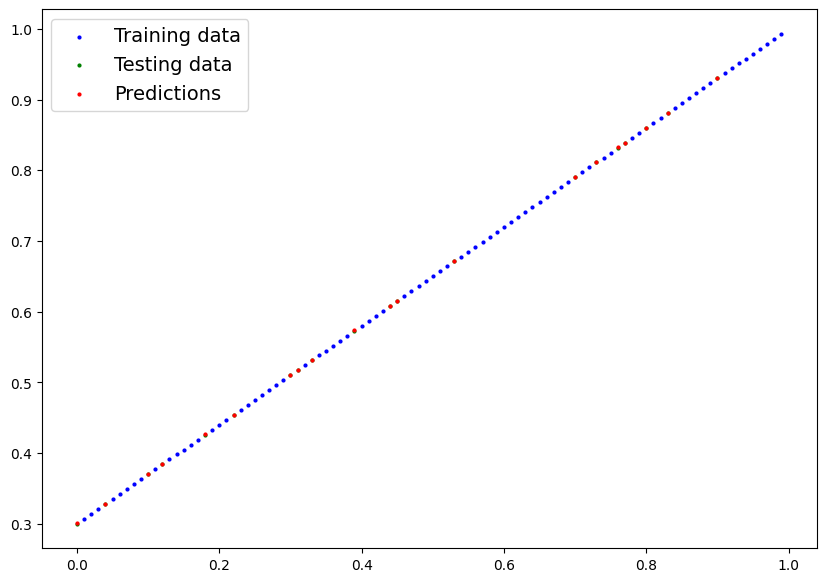

In [29]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

Predicțiile sunt suprapuse perfect peste datele de tesare, ceea ce înseamnă că modelul respectiv funcționează bine. Problema pe care am avut-o la acest proiect este faptul că datele cu care lucrăm sunt non-liniare, iar modelul în sine este unul liniar,  din moment ce folosim layere de tipul `torch.nn.Linear()`. Ca să avem un model valid pentru date care sunt non-liniare, în cadrul PyTorch există și anumite layere specifice pentru aceste tipuri de date. O să trecem prin aceste layere în cadrul următoarei lecții